**K Means Approach**

In [ ]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

from google.colab import drive

# Mount Google Drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# Path to your Excel file
excel_file_path = "/content/2302 - 1Lattice - Databook Tool v1.xlsx"
sheet_name = "in"  # Replace "your_sheet_name_here" with the actual sheet name

# Read only the specified sheet
data = pd.read_excel(excel_file_path, sheet_name=sheet_name)
data

,Unnamed: 0,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,...,Unnamed: 955,Unnamed: 956,Unnamed: 957,Unnamed: 958,Unnamed: 959,Unnamed: 960,Unnamed: 961,Unnamed: 962,Unnamed: 963,Unnamed: 964
0,,,,Respondent ID,Collector ID,Start Date,End Date,IP Address,Email Address,First Name,...,,,,,,,,,,
1,Status,,Image status,,,,,,,,...,,,,,,,,,,
2,Accept,NaN,https://lattice1.sharepoint.com/:i:/s/PGALIntr...,114000000000,428149737,2023-05-10 15:07:00,2023-05-10 15:21:00,103.220.16.46,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Accept,NaN,https://lattice1.sharepoint.com/:i:/s/PGALIntr...,114000000000,427882808,2023-05-10 14:29:00,2023-05-10 14:40:00,42.110.148.184,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Accept,NaN,NaN,114000000000,428149737,2023-05-10 13:25:00,2023-05-10 13:48:00,42.110.164.21,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
333,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
334,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
335,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
336,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
# Concatenate all columns to create a single column of text responses
text_responses = data.apply(lambda x: ' '.join(x.dropna().astype(str)), axis=1)


In [ ]:
# Feature extraction
vectorizer = TfidfVectorizer(max_features=1000)
X = vectorizer.fit_transform(text_responses)

# Normalization
scaler = StandardScaler(with_mean=False)  # Use with_mean=False for sparse matrices
X_normalized = scaler.fit_transform(X)


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


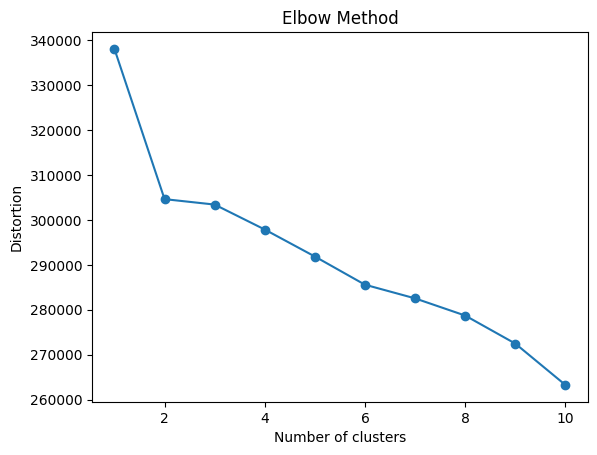

In [ ]:
# Choose the number of clusters
distortions = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, random_state=42)
    kmeans.fit(X_normalized)
    distortions.append(kmeans.inertia_)

# Plot elbow method
plt.plot(range(1, 11), distortions, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Distortion')
plt.title('Elbow Method')
plt.show()


In [ ]:
# Apply K-means clustering
k = 3  # Example: choosing 3 clusters
kmeans = KMeans(n_clusters=k, random_state=42)
kmeans.fit(X_normalized)


KMeans(n_clusters=3, random_state=42)

In [ ]:
# Interpret the clusters
centroids = kmeans.cluster_centers_
terms = vectorizer.get_feature_names_out()

for i, centroid in enumerate(centroids):
    print(f"Cluster {i + 1}:")
    top_features_idx = centroid.argsort()[-10:][::-1]
    top_features = [terms[idx] for idx in top_features_idx]
    print(top_features)


Cluster 1:
['drinks', 'nutrition', 'rank', '114000000000', 'user', 'old', 'maker', 'years', '2023', 'annum']
Cluster 2:
['capture', 'just', 'given', 'visuals', 'key', 'near', 'look', 'are', 'take', 'seen']
Cluster 3:
['khuku', 'jhwfwn', '7430000000', 'boshak', '232', '49', '16', 'increases', 'digestive', 'lactogrow']


In [ ]:

import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

/usr/local/lib/python3.10/dist-packages/sklearn/feature_extraction/text.py:409: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['arent', 'couldnt', 'didnt', 'doesnt', 'dont', 'hadnt', 'hasnt', 'havent', 'isnt', 'mightnt', 'mustnt', 'neednt', 'shant', 'shes', 'shouldnt', 'shouldve', 'thatll', 'wasnt', 'werent', 'wont', 'wouldnt', 'youd', 'youll', 'youre', 'youve'] not in stop_words.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


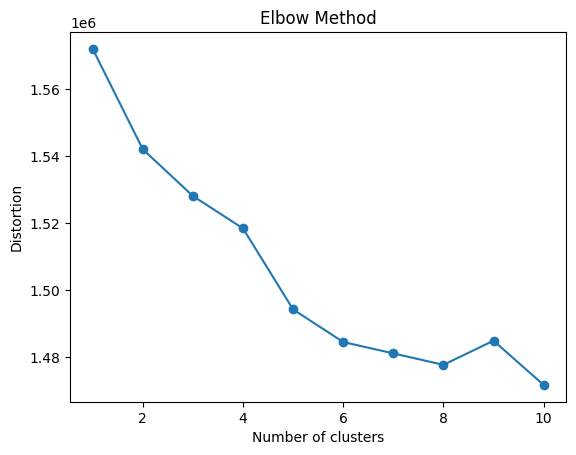

Cluster 1:
['living', 'inr', 'years', 'accept', 'aware', 'disagree', 'yes', 'never', '1000', 'physician', '4136535300', 'nuclear', 'partnerspouse', 'agree', 'diabetes', 'tried', 'general', 'months', '3000', 'times']
Cluster 2:
['inr', 'living', 'years', 'yes', 'disagree', 'aware', 'major', 'nothing', 'apps', 'availability', 'months', 'tried', 'never', 'purchased', 'satisfied', '4134895010', 'unchanged', 'currently', 'doctor', 'provides']
Cluster 3:
['inr', 'living', 'years', 'yes', 'doctor', 'aware', 'etc', 'devices', 'provides', 'medicine', 'delivery', 'doctors', 'availability', 'app', 'currently', 'time', 'months', 'products', 'services', '247']


In [ ]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
from nltk.corpus import stopwords
import string


# Load data from Google Drive
excel_file_path = "/content/2112-PGALabs-CCM patients-QC Book.xlsx"
sheet_name = "Survey responses"  # Replace "your_sheet_name_here" with the actual sheet name

# Read only the specified sheet
data = pd.read_excel(excel_file_path, sheet_name=sheet_name)

# Concatenate all columns to create a single column of text responses
text_responses = data.apply(lambda x: ' '.join(x.dropna().astype(str)), axis=1)

# Define custom stop words
custom_stopwords = set(stopwords.words('english'))
# Optionally, add additional stop words or remove specific words
# custom_stopwords.update(["your", "additional", "stop", "words"])

# Define a function to preprocess text
def preprocess_text(text):
    # Convert text to lowercase
    text = text.lower()
    # Remove punctuation
    text = text.translate(str.maketrans('', '', string.punctuation))
    return text

# Convert custom stop words set to a list
custom_stopwords_list = list(custom_stopwords)

# Feature extraction with custom stop words and preprocessing
vectorizer = TfidfVectorizer(max_features=2000, stop_words=custom_stopwords_list, preprocessor=preprocess_text)
X = vectorizer.fit_transform(text_responses)

# Normalization
scaler = StandardScaler(with_mean=False)  # Use with_mean=False for sparse matrices
X_normalized = scaler.fit_transform(X)

# Choose the number of clusters
distortions = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, random_state=42)
    kmeans.fit(X_normalized)
    distortions.append(kmeans.inertia_)

# Plot elbow method
plt.plot(range(1, 11), distortions, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Distortion')
plt.title('Elbow Method')
plt.show()

# Apply K-means clustering
k = 3  # Example: choosing 3 clusters
kmeans = KMeans(n_clusters=k, random_state=42)
kmeans.fit(X_normalized)

# Interpret the clusters
centroids = kmeans.cluster_centers_
terms = vectorizer.get_feature_names_out()

for i, centroid in enumerate(centroids):
    print(f"Cluster {i + 1}:")
    top_features_idx = centroid.argsort()[-20:][::-1]  # Increase the number of top features
    top_features = [terms[idx] for idx in top_features_idx]
    print(top_features)


**DBSCAN (Density-Based Spatial Clustering of Applications with Noise)**

In [ ]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import DBSCAN
from nltk.corpus import stopwords
import string

# Load data from Google Drive
excel_file_path = "/content/2302 - 1Lattice - Databook Tool v1.xlsx"
sheet_name = "in"  # Replace "your_sheet_name_here" with the actual sheet name

# Read only the specified sheet
data = pd.read_excel(excel_file_path, sheet_name=sheet_name)

# Concatenate all columns to create a single column of text responses
text_responses = data.apply(lambda x: ' '.join(x.dropna().astype(str)), axis=1)

# Define custom stop words
custom_stopwords = set(stopwords.words('english'))

# Convert custom stop words set to a list
custom_stopwords_list = list(custom_stopwords)

# Feature extraction with custom stop words and preprocessing
vectorizer = TfidfVectorizer(max_features=1000, stop_words=custom_stopwords_list)
X = vectorizer.fit_transform(text_responses)

# Apply DBSCAN clustering
dbscan = DBSCAN(eps=0.5, min_samples=5)  # Adjust parameters as needed
clusters = dbscan.fit_predict(X)

# Print the clusters
for cluster_id in set(clusters):
    print(f"Cluster {cluster_id}:")
    cluster_indices = [idx for idx, cluster in enumerate(clusters) if cluster == cluster_id]
    for idx in cluster_indices:
        print(text_responses.iloc[idx])
    print()


Cluster 0:
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
  278
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 

Cluster -1:
      Respondent ID Collector ID Start Date End Date IP Address Email Address First Name Last Name Custom Data 1 Name of the respondent? Mobile number City of the respondent? What is your occupation?   What is your highest educational qualification?  Age of respondent Are you a first-time mother? What is the age of your child? Who is the main bread-earner of the family? What is your average annual household income? Could you please tell me which of the products from the list of items are given to your children? (Select all that apply)           Which of the following Child Health & Nutrition Drink brands do you currently use for your child? (Select all that apply) [Note to surveyor: The question is open ended for the respondent. do not show the list of options.]                           Which of the following best describes your role in purchases of

In [ ]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import DBSCAN
from nltk.corpus import stopwords

# Load data from Google Drive
excel_file_path = "/content/2112-PGALabs-CCM patients-QC Book.xlsx"
sheet_name = "Survey responses"  # Replace "your_sheet_name_here" with the actual sheet name

# Read only the specified sheet
data = pd.read_excel(excel_file_path, sheet_name=sheet_name)

# Concatenate all columns to create a single column of text responses
text_responses = data.apply(lambda x: ' '.join(x.dropna().astype(str)), axis=1)

# Define custom stop words
custom_stopwords = stopwords.words('english')
# Optionally, add additional stop words or remove specific words
# custom_stopwords.extend(["your", "additional", "stop", "words"])

# Feature extraction with custom stop words
vectorizer = TfidfVectorizer(max_features=1000, stop_words=custom_stopwords)
X = vectorizer.fit_transform(text_responses)

# Normalization
scaler = StandardScaler(with_mean=False)  # Use with_mean=False for sparse matrices
X_normalized = scaler.fit_transform(X)

# Apply DBSCAN clustering
dbscan = DBSCAN(eps=0.5, min_samples=5)  # Adjust parameters as needed
clusters = dbscan.fit_predict(X_normalized)

# Print condensed output for each cluster
for cluster_id in set(clusters):
    print(f"Cluster {cluster_id}:")
    cluster_indices = [idx for idx, cluster in enumerate(clusters) if cluster == cluster_id]
    for idx in cluster_indices[:3]:  # Print only a subset of entries from each cluster
        print(text_responses.iloc[idx])
    print("...")
    print()


Cluster -1:
Open-Ended Response Response Other (please specify) Arthritis Cancer Asthma Other chronic inflammatory lung disease (COPD, Fibrosis) Diabetes Heart disease HIV / AIDS Depression Hypertension Alzheimer’s disease Parkinson’s disease Dementia Other (please specify) Response Response Response Response General physician Specialist doctor I forget to have my medicine frequently, need others to remind me I use personal attendant at home I miss ordering the medicines/consumables at regular intervals I miss my doctor’s appointments I find it difficult to arrange attendants at home when health deteriorates or need some professional help I find it difficult to monitor my health conditions regularly I don’t know what to do to prevent from health deterioration I rely on Google, YouTube and other public information for diet recommendations I am unable to physically visit my doctor for regular/scheduled check ups Response PhableCare BeatO Wellthy Sugar.fit Twin Zyla Zivov Visit SiCureMi E

**hierarchical clustering with the AgglomerativeClustering algorithm from scikit-learn**

In [ ]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import AgglomerativeClustering
from nltk.corpus import stopwords
import numpy as np

# Load data from Google Drive
excel_file_path = "/content/2112-PGALabs-CCM patients-QC Book.xlsx"
sheet_name = "Survey responses"  # Replace "your_sheet_name_here" with the actual sheet name

# Read only the specified sheet
data = pd.read_excel(excel_file_path, sheet_name=sheet_name)

# Concatenate all columns to create a single column of text responses
text_responses = data.apply(lambda x: ' '.join(x.dropna().astype(str)), axis=1)

# Define custom stop words
custom_stopwords = stopwords.words('english')
# Optionally, add additional stop words or remove specific words
# custom_stopwords.extend(["your", "additional", "stop", "words"])

# Feature extraction with custom stop words
vectorizer = TfidfVectorizer(max_features=1000, stop_words=custom_stopwords)
X = vectorizer.fit_transform(text_responses)

# Convert sparse matrix to dense numpy array
X_dense = X.toarray()

# Normalization
scaler = StandardScaler(with_mean=False)  # Use with_mean=False for sparse matrices
X_normalized = scaler.fit_transform(X_dense)

# Apply Agglomerative clustering
agg_clustering = AgglomerativeClustering(n_clusters=5)  # Adjust the number of clusters as needed
clusters = agg_clustering.fit_predict(X_normalized)

# Print condensed output for each cluster
for cluster_id in set(clusters):
    print(f"Cluster {cluster_id}:")
    cluster_indices = [idx for idx, cluster in enumerate(clusters) if cluster == cluster_id]
    for idx in cluster_indices[:3]:  # Print only a subset of entries from each cluster
        print(text_responses.iloc[idx])
    print("...")
    print()


Cluster 0:
Accept 13242202453.0 413653530.0 2022-01-06 16:27:38 2022-01-06 16:42:19 27.59.122.134 Maliika Bangalore Diabetes 3 - 5 years INR 1,000 - 3,000 General physician General physician Once in 2 months Once in 3 months Disagree Agree Disagree Disagree Disagree Agree Agree Agree Disagree Yes Not aware Not aware Aware but never tried Aware but never tried Not aware Not aware Not aware Not aware Not aware Not aware Aware but never tried Aware but never tried Not aware Aware but never tried Not aware General practitioner doctor Social media promotions/ campaigns (Insta, FB, Twitter, LinkedIn, etc) Other patients, friends, and family Yes Availability of medical devices App provides regular updates to doctor Provides health and lifestyle management tips 45 - 54 years INR 4 to 7.99L Homemaker Nuclear (living with partner/spouse) 9880030701 LokeshST 9999999999 General practitioner doctorSocial media promotions/ campaigns (Insta, FB, Twitter, LinkedIn, etc)Other patients, friends, and fam

In [ ]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import AgglomerativeClustering
from nltk.corpus import stopwords
import numpy as np

# Load data from Google Drive
excel_file_path = "/content/2112-PGALabs-CCM patients-QC Book.xlsx"
sheet_name = "Survey responses"  # Replace "your_sheet_name_here" with the actual sheet name

# Read only the specified sheet
data = pd.read_excel(excel_file_path, sheet_name=sheet_name)

# Concatenate all columns to create a single column of text responses
text_responses = data.apply(lambda x: ' '.join(x.dropna().astype(str)), axis=1)

# Define custom stop words
custom_stopwords = stopwords.words('english')

# Feature extraction with custom stop words
vectorizer = TfidfVectorizer(max_features=1000, stop_words=custom_stopwords)
X = vectorizer.fit_transform(text_responses)

# Convert sparse matrix to dense numpy array
X_dense = X.toarray()

# Normalization
scaler = StandardScaler(with_mean=False)  # Use with_mean=False for sparse matrices
X_normalized = scaler.fit_transform(X_dense)

# Apply Agglomerative clustering
agg_clustering = AgglomerativeClustering(n_clusters=5)  # Adjust the number of clusters as needed
clusters = agg_clustering.fit_predict(X_normalized)

# Print condensed output for each cluster
for cluster_id in set(clusters):
    print(f"Cluster {cluster_id}:")
    cluster_indices = [idx for idx, cluster in enumerate(clusters) if cluster == cluster_id]
    for idx in cluster_indices[:3]:  # Print only the first three entries from each cluster
        print(text_responses.iloc[idx])
    print("...")
    print()


Cluster 0:
Accept 13242202453.0 413653530.0 2022-01-06 16:27:38 2022-01-06 16:42:19 27.59.122.134 Maliika Bangalore Diabetes 3 - 5 years INR 1,000 - 3,000 General physician General physician Once in 2 months Once in 3 months Disagree Agree Disagree Disagree Disagree Agree Agree Agree Disagree Yes Not aware Not aware Aware but never tried Aware but never tried Not aware Not aware Not aware Not aware Not aware Not aware Aware but never tried Aware but never tried Not aware Aware but never tried Not aware General practitioner doctor Social media promotions/ campaigns (Insta, FB, Twitter, LinkedIn, etc) Other patients, friends, and family Yes Availability of medical devices App provides regular updates to doctor Provides health and lifestyle management tips 45 - 54 years INR 4 to 7.99L Homemaker Nuclear (living with partner/spouse) 9880030701 LokeshST 9999999999 General practitioner doctorSocial media promotions/ campaigns (Insta, FB, Twitter, LinkedIn, etc)Other patients, friends, and fam